In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
# 輸入特徵
X = iris.data
# 輸出特徵
y = iris.target

In [3]:
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# Principal component analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1) #4維降為2維
train_reduced = pca.fit_transform(X_train)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.92390396 0.05371612]
PCA方差值: [4.38034545 0.25467493]


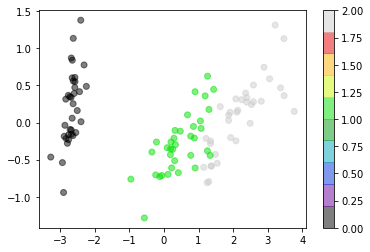

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(train_reduced[:,0], train_reduced[:,1], c=y_train, alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10)) 
# Show the plot 
plt.colorbar()
plt.show()

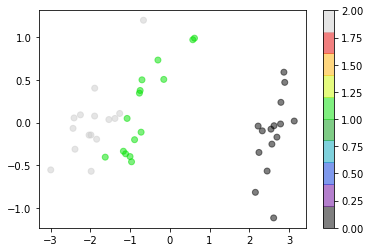

In [6]:
train_reduced = pca.fit_transform(X_test)

plt.figure(figsize=(6,4))
plt.scatter(train_reduced[:,0], train_reduced[:,1], c=y_test, alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10)) 
# Show the plot 
plt.colorbar()
plt.show()

In [7]:
# T-Distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)

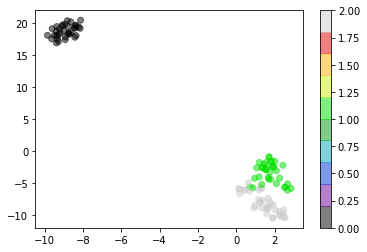

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(train_reduced[:,0], train_reduced[:,1], c=y_train, alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10)) 
# Show the plot 
plt.colorbar()
plt.show()